# **Project Assignment - Part A**
<p align="center"><strong>Financial Econometrics II </strong> </p>  
<p align="center">Nicolás Rivera & Aida Hodzic</p>

### **1. Creating the environment and loading necessary packages**
*Creating a folder for our project, along with the script file and retreiving necessary packages.*

In [98]:
import Pkg
Pkg.activate(".")
include("script.jl")

  Activating project at `c:\Users\Korisnik\Documents\GitHub\Project-1`


In [2]:
using Pkg, MarketData, Dates, DataFrames, Statistics, SpecialFunctions, StatsBase, ARCHModels, Flux, LinearAlgebra, GLM, GR, Distributions, PrettyTables, StatsPlots

Precompiling SpecialFunctions
┌ Warning: attempting to remove probably stale pidfile
│   path = "C:\\Users\\Korisnik\\.julia\\compiled\\v1.10\\BinaryProvider\\ek6VZ_tSR20.ji.pidfile"
└ @ FileWatching.Pidfile C:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\pidfile.jl:244
  ✗ BinaryProvider
        Info Given SpecialFunctions was explicitly requested, output will be shown live 
ERROR: LoadError: SpecialFunctions is not installed properly, run `Pkg.build("SpecialFunctions")`,restart Julia and try again
Stacktrace:
 [1] error(s::String)
   @ Base .\error.jl:35
 [2] top-level scope
   @ C:\Users\Korisnik\.julia\packages\SpecialFunctions\ne2iw\src\SpecialFunctions.jl:6
 [3] include
   @ .\Base.jl:495 [inlined]
 [4] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt128}}, source::Nothing)
   @ Base .\

LoadError: The following 1 direct dependency failed to precompile:

SpecialFunctions [276daf66-3868-5448-9aa4-cd146d93841b]

Failed to precompile SpecialFunctions [276daf66-3868-5448-9aa4-cd146d93841b] to "C:\\Users\\Korisnik\\.julia\\compiled\\v1.10\\SpecialFunctions\\jl_AB82.tmp".
[91m[1mERROR: [22m[39mLoadError: SpecialFunctions is not installed properly, run `Pkg.build("SpecialFunctions")`,restart Julia and try again
Stacktrace:
 [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
 [2] top-level scope
[90m   @[39m [90mC:\Users\Korisnik\.julia\packages\SpecialFunctions\ne2iw\src\[39m[90m[4mSpecialFunctions.jl:6[24m[39m
 [3] [0m[1minclude[22m
[90m   @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [4] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mNothing[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [5] top-level scope
[90m   @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Korisnik\.julia\packages\SpecialFunctions\ne2iw\src\SpecialFunctions.jl:1
in expression starting at stdin:

In [5]:
#Pkg.add(["MarketData", "Dates", "DataFrames", "Statistics","Plots", "StatsBase", "Distributions", "StatsPlots", "Images", "PrettyTables", "ARCHModels", "Flux", "LinearAlgebra", "GLM"])


In [6]:
#Pkg.add("Distributions")

In [7]:
#Pkg.add(["LinearAlgebra","BSON", "Optim","GARCH", "ARCHModels","Flux","GLM"])

### **2. Loading data on Ford Motor Co. stock prices**
*Using package MarketData and downloading data for the assset Ford Motor Co. for time period 1998 - present.*

In [3]:
start_date = DateTime("1998-01-01")
end_date = DateTime("2024-10-26") 

2024-10-26T00:00:00

In [4]:
data = DataFrame(yahoo(:F, YahooOpt(period1 = start_date, period2 = end_date)));
first(data,5)

Row,timestamp,Open,High,Low,Close,AdjClose,Volume
,Date,Float64,Float64,Float64,Float64,Float64,Float64
1,1998-01-02,17.7686,17.8371,17.5633,17.609,7.15526,5.32288e6
2,1998-01-05,17.609,17.7002,17.4493,17.7002,7.19233,7.01269e6
3,1998-01-06,17.609,17.609,17.1528,17.4037,7.07185,7.45631e6
4,1998-01-07,17.2896,17.3809,16.9019,17.1984,6.98843,9.09872e6
5,1998-01-08,16.9019,17.0159,16.4001,16.4457,6.68257,9.75305e6


### **3. Summary Statistics**
*Using plots to look at the data and interpereting the summary statistics of the dataset.*

The dataset contains 6748 rows and 7 columns. Descriptive Statistics dataframe shows no missing values and all variables are of the same, Float 64 datatype. 

In [5]:
size(data) 

(6748, 7)

In [6]:
data1 = data[:,2:end] 
summary_stat = describe(data1) 
summary_stat = select(summary_stat, 1:5)
println(summary_stat)

6×5 DataFrame
 Row │ variable  mean        min       median      max        
     │ Symbol    Float64     Float64   Float64     Float64    
─────┼────────────────────────────────────────────────────────
   1 │ Open      13.7064     1.31      12.33       36.8195
   2 │ High      13.892      1.55      12.46       37.3003
   3 │ Low       13.5052     1.01      12.17       35.7204
   4 │ Close     13.6943     1.26      12.32       36.6478
   5 │ AdjClose   8.08226    0.705544   7.84962    20.9129
   6 │ Volume     4.05788e7  1.0243e6   3.38382e7   5.41176e8


There is a really wide range of values between the minimum and maximum (from 1 to 37), indicating significant fluctuations and high price volatility for the Ford Motor Co stocks. The median being around 12 lets us assume that the asset is usually priced around lower values and although it does have spikes in prices, they might be relatively rare. Being more or less consistent at a value around 12 for open, high, low and close prices, and not too different from the mean, suggests a symmetric distribution (but with occasional extreme spikes in prices).

In [23]:
using StatsBase

# Calculating higher moments

n = length(data1[1,:]) 
sd = Vector{Float64}(undef, n)
variance = Vector{Float64}(undef, n)
skew = Vector{Float64}(undef, n)
kur = Vector{Float64}(undef, n)
Variables = names(data1)
summary_stat2 = DataFrame(Variables = Variables, std_dev = sd, var = variance, skew = skew, kur = kur)
for i in 1:n 
    summary_stat2[i,2] = std(data1[:,i])
    summary_stat2[i,3] = var(data1[:,i])
    summary_stat2[i,4] = skewness(data1[:,i])
    summary_stat2[i,5] = kurtosis(data1[:,i])
end
adding_columns = select(summary_stat2, :std_dev, :var, :skew, :kur)
stats = hcat(summary_stat, adding_columns) 


Row,variable,mean,min,median,max,std_dev,var,skew,kur
,Symbol,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,Open,13.7064,1.31,12.33,36.8195,6.52351,42.5562,1.23552,1.25385
2,High,13.892,1.55,12.46,37.3003,6.62182,43.8485,1.24915,1.26425
3,Low,13.5052,1.01,12.17,35.7204,6.43734,41.4393,1.21741,1.23084
4,Close,13.6943,1.26,12.32,36.6478,6.52659,42.5964,1.2315,1.2482
5,AdjClose,8.08226,0.705544,7.84962,20.9129,3.08935,9.54411,0.255535,-0.122362
6,Volume,4.05788e7,1.0243e6,3.38382e7,5.41176e8,3.69998e7,1.36898e15,2.75916,16.684


Continuing further with descriptive statistics for higher moments, we notice that all variables are positively skewed and expect that there will be a higher likelihood of experiencing extreme positive returns, rather than negative. However, kurtosis is always less than 2, indicating a significantly flatter distribution and fewer extreme values. Looking at adjusted close values, we can see that adjusting for dividends and stock splits has a big effect on reducing the extreme fluctuations in price.  
To get a more comprehensive overview we put the measures together.

In [24]:
cov_matrix = cov(Matrix(data1))

6×6 Matrix{Float64}:
 42.5562     43.176      41.9712     42.535      15.9322     -8.90384e7
 43.176      43.8485     42.5974     43.1986     16.1682     -8.92264e7
 41.9712     42.5974     41.4393     41.9942     15.7587     -8.94821e7
 42.535      43.1986     41.9942     42.5964     15.9748     -8.92909e7
 15.9322     16.1682     15.7587     15.9748      9.54411    -1.28222e7
 -8.90384e7  -8.92264e7  -8.94821e7  -8.92909e7  -1.28222e7   1.36898e15

**Covariance matrix** shows us that trading volume has a negative covariance with other price variables, implying that a high trading volume is associated with lower prices.  
The price variables, however, have positive covariances with eachother, indicating that they experience movements in the same direction and when opening price is high, the closing tends to be as well. This is to be expected from financial markets, as these prices typically move together throughout the trading day.    

In [25]:
cor_matrix = cor(Matrix(data1))

6×6 Matrix{Float64}:
  1.0        0.999502   0.999456   0.999031   0.790543  -0.368891
  0.999502   1.0        0.99931    0.999553   0.790346  -0.364181
  0.999456   0.99931    1.0        0.999532   0.792405  -0.375691
  0.999031   0.999553   0.999532   1.0        0.792282  -0.369762
  0.790543   0.790346   0.792405   0.792282   1.0       -0.112175
 -0.368891  -0.364181  -0.375691  -0.369762  -0.112175   1.0

**Correlation matrix** between the trading volume and all other price variables shows a negative, but weak linear relationship. This comes as no surprise and follows our basic economic intuition.  
Price variables have very high (0.99) correlation coefficients between eachother, indicating strong positive relationships, as we would expect.  
Adjusted Close price still exhibits a strong positive correlation to other price variables, but slightly lower as it is adjusted for splits and dividends which may reduce the correlation with the unadjusted variables.

**Visually analyzing the variables**

In [26]:
using Plots

In [27]:
columns = [data[:,2], data[:,3], data[:,4], data[:,5], data[:,6], data[:,7]];
labels = ["Open Price", "High Price", "Low Price", "Close Price", "Adjusted Close Price", "Trading volume"];

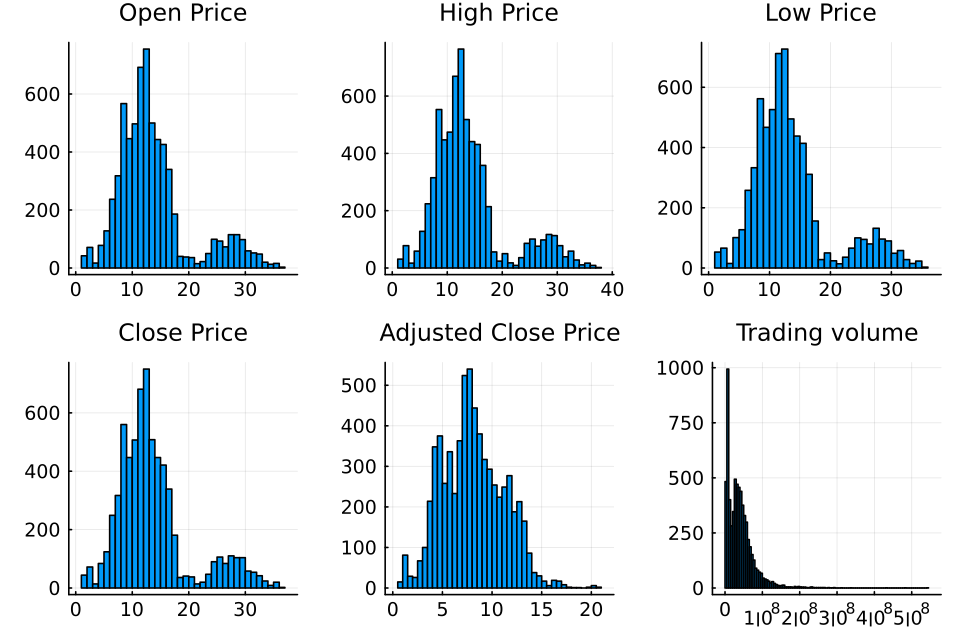

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [28]:
histograms = [histogram(columns[i], label=labels[i], legend=:false, title=labels[i], titlefont = font(10), dpi=40, size=(600, 400)) for i in 1:length(columns)]
histvol = histogram(data[:,7], label = "Trading Volume", legend=false, titlefont = font(10), dpi=40, size=(600,400))
final_hist = plot(histograms...,layout=(2,3), size=(600,400))
display(final_hist)
 

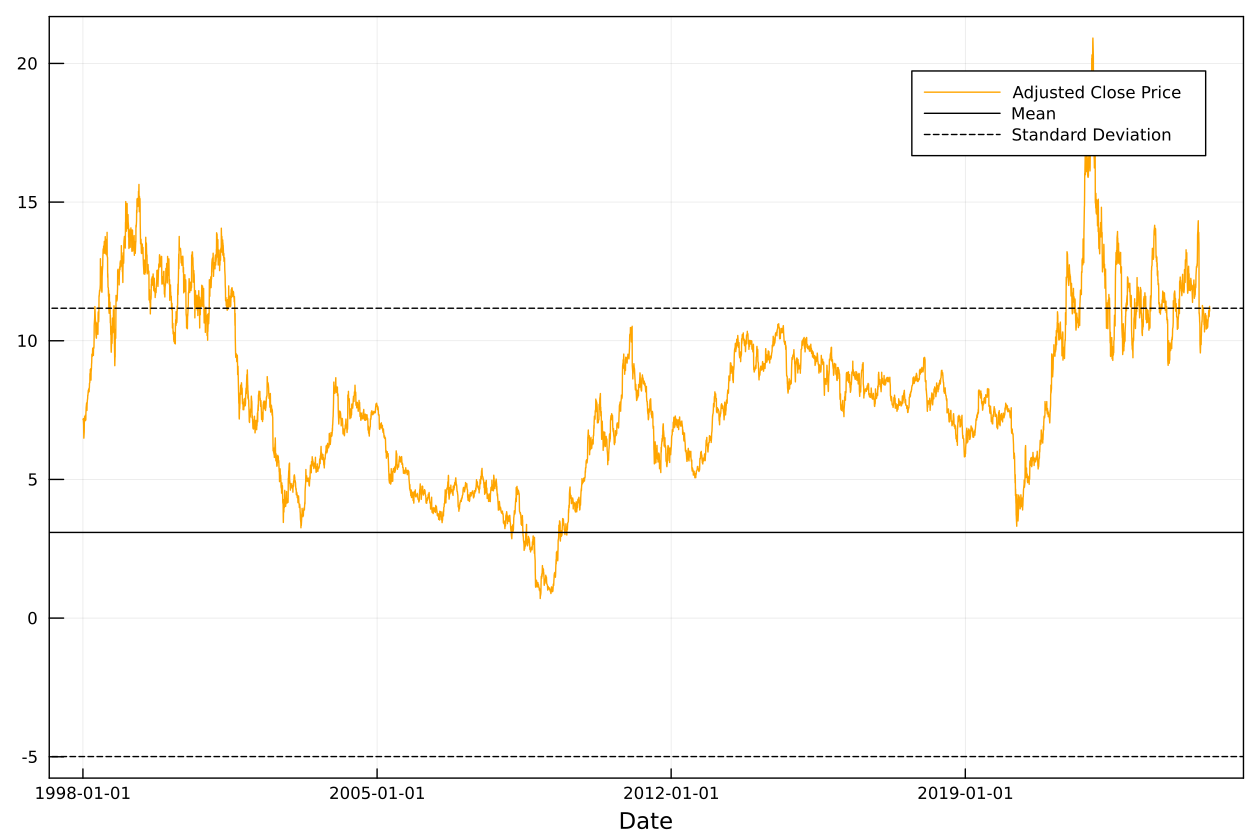

In [29]:
#using Plots
#adjclose = data[:,6];
#adjclose_h = histogram(adjclose, color=:blue, size=(600, 400),framestyle=:box,title = "Adjusted Close Prices", legend=false,ylab = "Count", dpi=25)
adjclose_plot = plot(data[:,1], data[:,6], line=(1., 1, :solid), framestyle=:box, label="Adjusted Close Price", color="orange", xlab = "Date", size=(900,600),dpi=35)
hline!([stats[5,6]], label = "Mean", color = "black", line=(1., 1, :solid))
hline!([stats[5,6] - stats[5,2], stats[5,2] + stats[5,6]], label = "Standard Deviation", color = "black", line=(1., 1, :dash))

**Plotting time series for each variable**

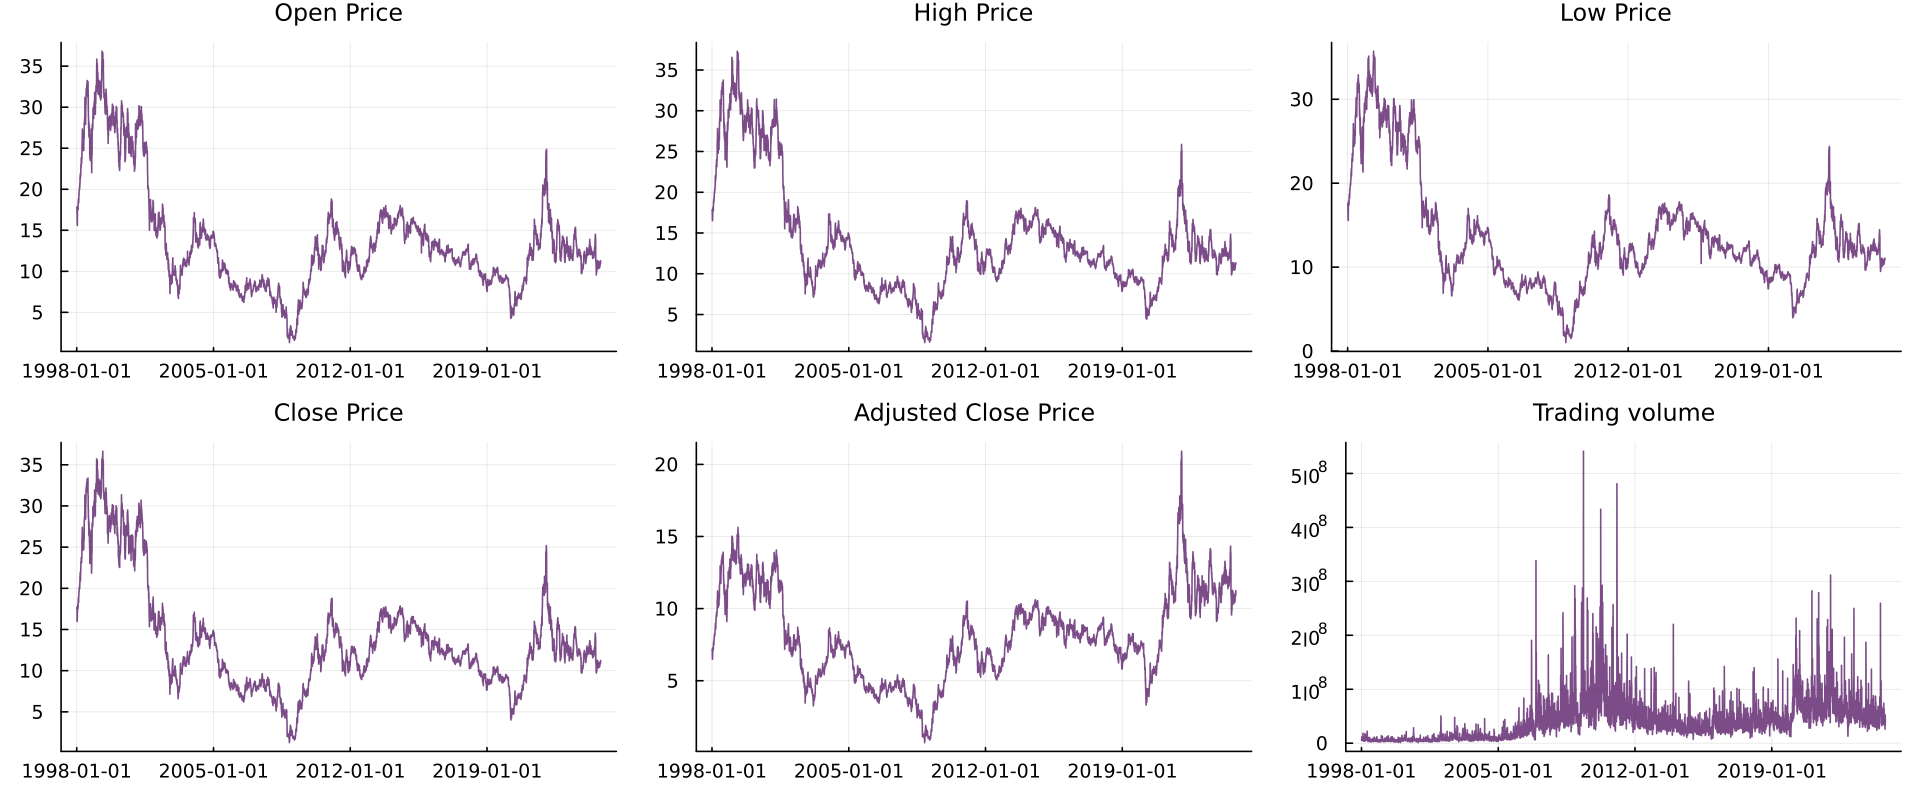

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [30]:
time_series = [Plots.plot(data[:, 1], columns[i], legend=false, title=labels[i], bins = 30, titlefont= font(10),line=(1., 0.7, :solid),palette=:viridis, dpi=40, size=(1200,500)) for i in 1:length(columns)]
comb_plot = plot(time_series..., layout=(2,3), size=(1200,500))
display(comb_plot)

## **4. ARCHModels**  
### *Calculating returns*  
Calculating returns and observing the histogram shows that returns of adjusted close prices seem normally distributed with the presence of some outliers.

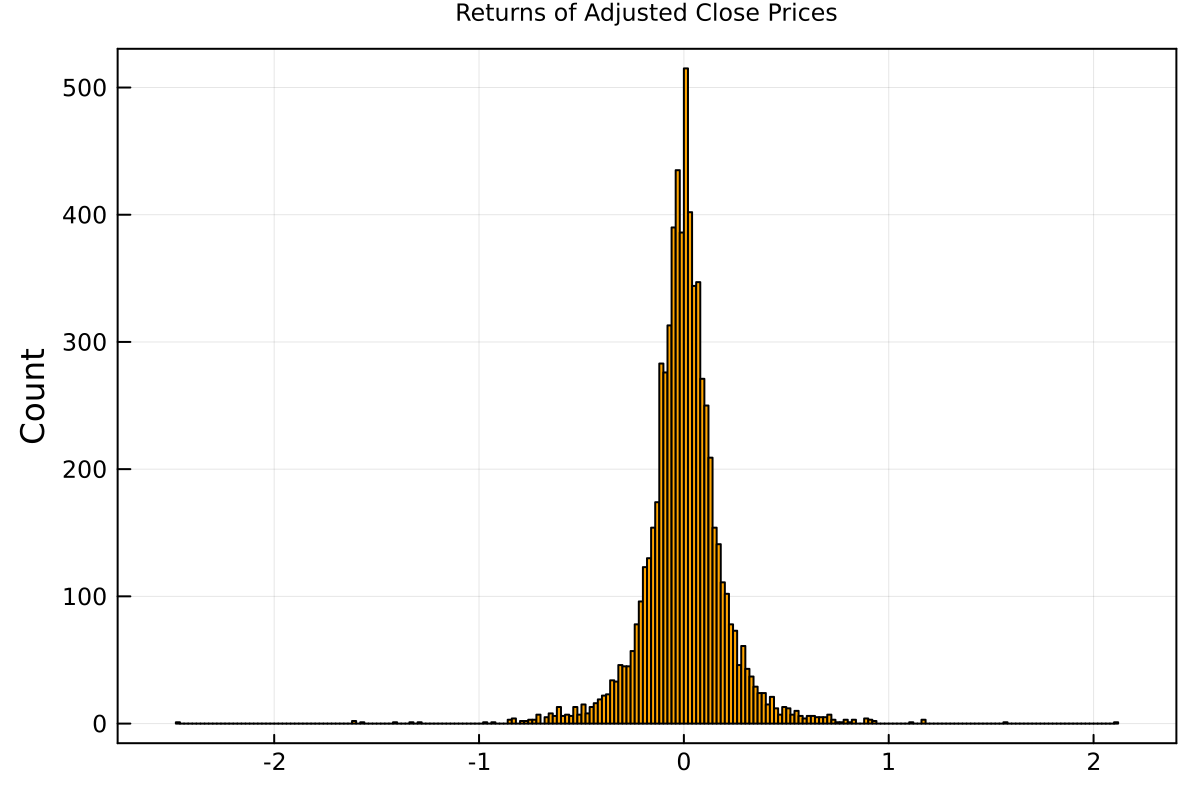

In [32]:
ret = diff(data[:,6]);
h3 = histogram(ret, framestyle=:box, title = "Returns of Adjusted Close Prices", titlefont=font(8), legend=false, ylab = "Count",color="orange",dpi=50)

Running a check to see the **summary statistics** of the returns shows that the mean is around 0. Minimum and maximum values highlight volatility and show both significant losses and gains through the observed timespan. 3rd quartile reveals that 25% of returns go beyond 0.0899, meaning that although majority of the returns are positive, substantial gains are not that frequent.

In [33]:
println(describe(ret))

Summary Stats:
Length:         6747
Missing Count:  0
Mean:           0.000580
Minimum:        -2.471503
1st Quartile:   -0.086705
Median:         0.000000
3rd Quartile:   0.089907
Maximum:        2.108721
Type:           Float64
nothing


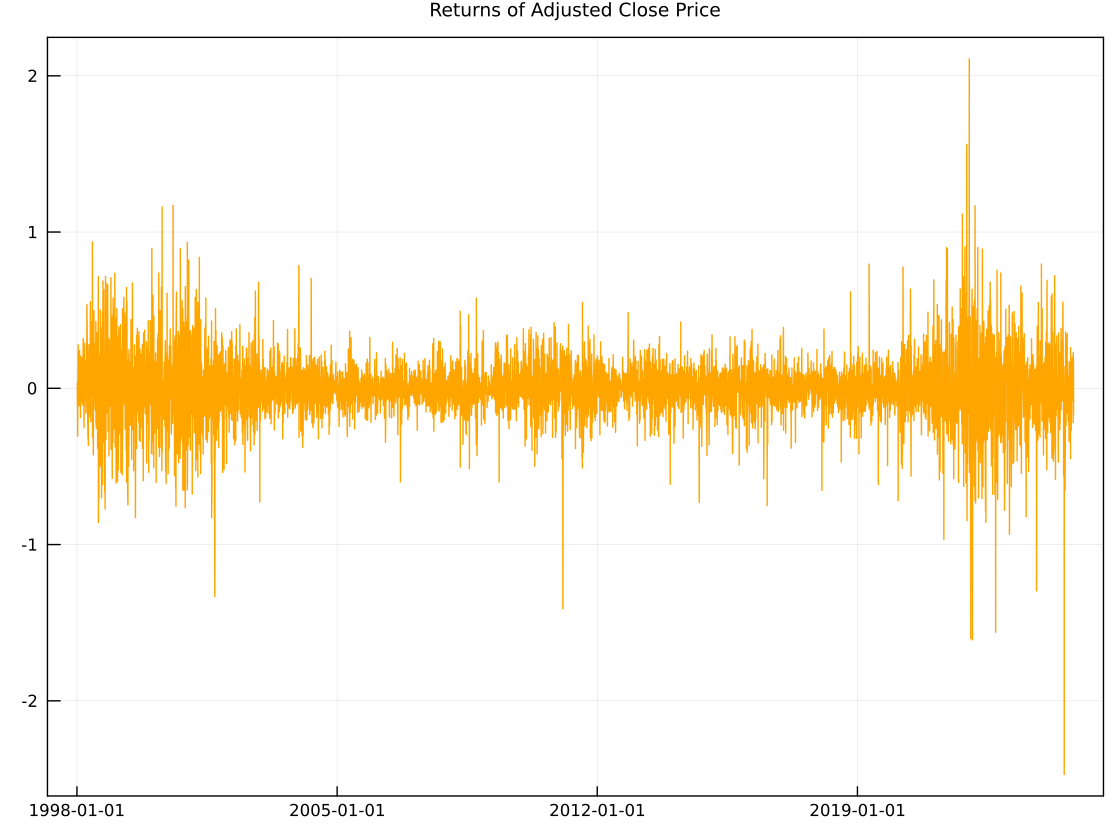

In [75]:
times = data[2:end, 1];
retplot = Plots.plot(times, ret, title="Returns of Adjusted Close Price",titlefont = font(9), legend=false,framestyle=:box, color = "orange", dpi=35, size = (800,600))

**The stronget periods of volatility are noticeable during the financial crisis of 2008-09 and even more so, during the pandemic period of 2019-20.**

In [76]:
# Calculate log returns
log_ret = diff(log.(data[:,6]));
describe(log_ret)

Summary Stats:
Length:         6747
Missing Count:  0
Mean:           0.000065
Minimum:        -0.287682
1st Quartile:   -0.012133
Median:         0.000000
3rd Quartile:   0.012117
Maximum:        0.258650
Type:           Float64


### *Calculating log returns*  
For better statistical modelling, we observe **log returns** and their descriptive statistics. The mean is around 0, maximum increase noted was for 25.8% and decrease 28.7%.

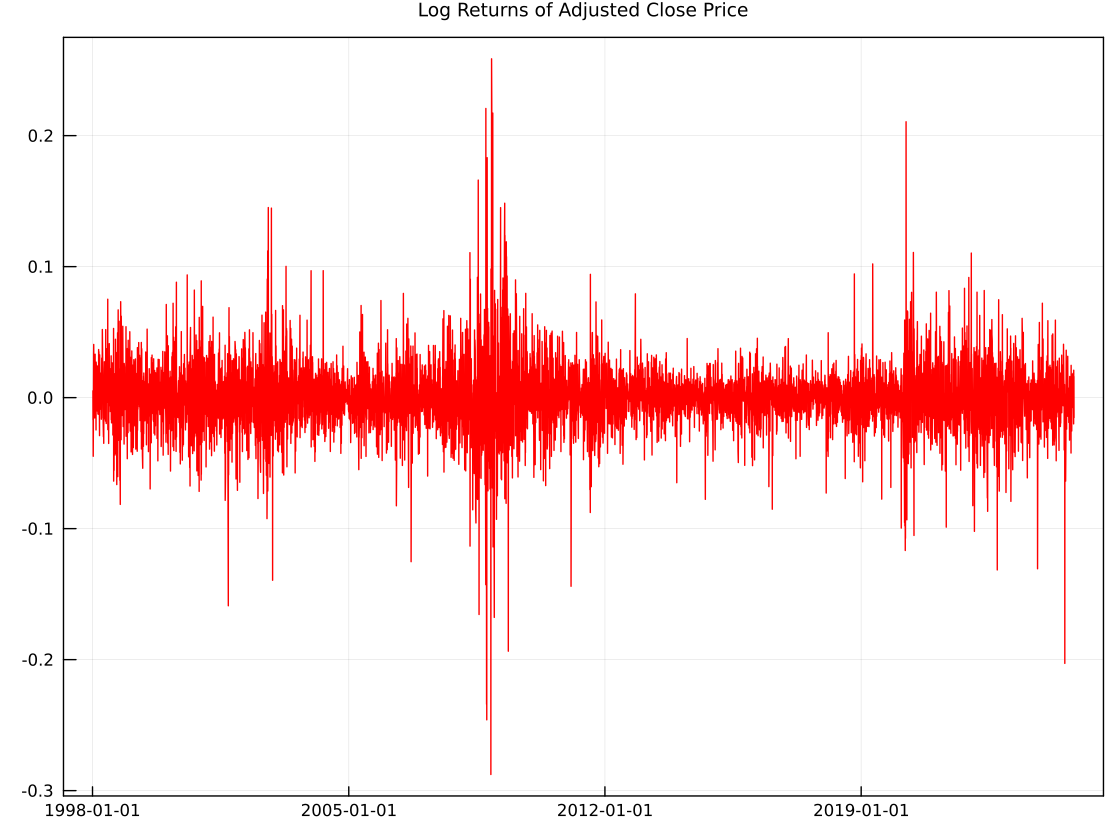

In [79]:
log_retplot = plot(times, log_ret, title="Log Returns of Adjusted Close Price",titlefont = font(9), legend=false,framestyle=:box, color = "red", dpi=35, size = (800,600))

**Plotting the log returns of adjusted close prices show the highest volatility period during the 2008-09 financial crisis, but also post-2019, reflecting periods of market stress and uncertainity.**

### *Volatility modelling*

In [103]:
using ARCHModels.jl

Precompiling ARCHModels
  ✗ BinaryProvider
  ✗ SpecialFunctions
┌ Warning: attempting to remove probably stale pidfile
│   path = "C:\\Users\\Korisnik\\.julia\\compiled\\v1.10\\ForwardDiff\\k0ETY_tSR20.ji.pidfile"
└ @ FileWatching.Pidfile C:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\pidfile.jl:244
  ✗ StatsFuns
  ✗ ForwardDiff
┌ Warning: attempting to remove probably stale pidfile
│   path = "C:\\Users\\Korisnik\\.julia\\compiled\\v1.10\\MathOptInterface\\tyub8_tSR20.ji.pidfile"
└ @ FileWatching.Pidfile C:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\pidfile.jl:244
  ✗ Distributions
  ✗ StatsModels
  ✗ NLSolversBase
  ✗ Roots → RootsForwardDiffExt
  ✗ GLM
  ✗ LineSearches
  ✗ HypothesisTests
  ✗ Optim
  ✗ MathOptInterface
  ✗ Optim → OptimMOIExt
        Info Given ARCHModels was explicitly requested, output will be shown live 
ERROR: LoadError: SpecialFunctions is not 

LoadError: The following 5 direct dependencies failed to precompile:

ARCHModels [6d3278bc-c23a-5105-85e5-0d57d2bf684f]

Failed to precompile ARCHModels [6d3278bc-c23a-5105-85e5-0d57d2bf684f] to "C:\\Users\\Korisnik\\.julia\\compiled\\v1.10\\ARCHModels\\jl_FAD.tmp".
[91m[1mERROR: [22m[39mLoadError: SpecialFunctions is not installed properly, run `Pkg.build("SpecialFunctions")`,restart Julia and try again
Stacktrace:
 [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
 [2] top-level scope
[90m   @[39m [90mC:\Users\Korisnik\.julia\packages\SpecialFunctions\ne2iw\src\[39m[90m[4mSpecialFunctions.jl:6[24m[39m
 [3] [0m[1minclude[22m
[90m   @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [4] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mString[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [5] top-level scope
[90m   @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Korisnik\.julia\packages\SpecialFunctions\ne2iw\src\SpecialFunctions.jl:1
in expression starting at stdin:3
[91m[1mERROR: [22m[39mLoadError: Failed to precompile SpecialFunctions [276daf66-3868-5448-9aa4-cd146d93841b] to "C:\\Users\\Korisnik\\.julia\\compiled\\v1.10\\SpecialFunctions\\jl_1BA6.tmp".
Stacktrace:
  [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
  [2] [0m[1mcompilecache[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90mpath[39m::[0mString, [90minternal_stderr[39m::[0mIO, [90minternal_stdout[39m::[0mIO, [90mkeep_loaded_modules[39m::[0mBool[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2468[24m[39m
  [3] [0m[1mcompilecache[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2340[24m[39m[90m [inlined][39m
  [4] [0m[1m(::Base.var"#968#969"{Base.PkgId})[22m[0m[1m([22m[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1974[24m[39m
  [5] [0m[1mmkpidlock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mat[39m::[0mString, [90mpid[39m::[0mInt32; [90mkwopts[39m::[0m@Kwargs[90m{stale_age::Int64, wait::Bool}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:93[24m[39m
  [6] [0m[1m#mkpidlock#6[22m
[90m    @[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:88[24m[39m[90m [inlined][39m
  [7] [0m[1mtrymkpidlock[22m[0m[1m([22m::[0mFunction, ::[0mVararg[90m{Any}[39m; [90mkwargs[39m::[0m@Kwargs[90m{stale_age::Int64}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:111[24m[39m
  [8] [0m[1m#invokelatest#2[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:894[24m[39m[90m [inlined][39m
  [9] [0m[1minvokelatest[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:889[24m[39m[90m [inlined][39m
 [10] [0m[1mmaybe_cachefile_lock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mpkg[39m::[0mBase.PkgId, [90msrcpath[39m::[0mString; [90mstale_age[39m::[0mInt64[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2983[24m[39m
 [11] [0m[1mmaybe_cachefile_lock[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2980[24m[39m[90m [inlined][39m
 [12] [0m[1m_require[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1970[24m[39m
 [13] [0m[1m__require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1812[24m[39m
 [14] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [15] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [16] [0m[1m_require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1803[24m[39m
 [17] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:1790[24m[39m[90m [inlined][39m
 [18] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mlock.jl:267[24m[39m[90m [inlined][39m
 [19] [0m[1m__require[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1753[24m[39m
 [20] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [21] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [22] [0m[1mrequire[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1746[24m[39m
 [23] [0m[1minclude[22m
[90m    @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [24] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [25] top-level scope
[90m    @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Korisnik\.julia\packages\StatsFuns\P7Mci\src\StatsFuns.jl:3
in expression starting at stdin:3
[91m[1mERROR: [22m[39mLoadError: Failed to precompile StatsFuns [4c63d2b9-4356-54db-8cca-17b64c39e42c] to "C:\\Users\\Korisnik\\.julia\\compiled\\v1.10\\StatsFuns\\jl_180D.tmp".
Stacktrace:
  [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
  [2] [0m[1mcompilecache[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90mpath[39m::[0mString, [90minternal_stderr[39m::[0mIO, [90minternal_stdout[39m::[0mIO, [90mkeep_loaded_modules[39m::[0mBool[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2468[24m[39m
  [3] [0m[1mcompilecache[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2340[24m[39m[90m [inlined][39m
  [4] [0m[1m(::Base.var"#968#969"{Base.PkgId})[22m[0m[1m([22m[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1974[24m[39m
  [5] [0m[1mmkpidlock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mat[39m::[0mString, [90mpid[39m::[0mInt32; [90mkwopts[39m::[0m@Kwargs[90m{stale_age::Int64, wait::Bool}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:93[24m[39m
  [6] [0m[1m#mkpidlock#6[22m
[90m    @[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:88[24m[39m[90m [inlined][39m
  [7] [0m[1mtrymkpidlock[22m[0m[1m([22m::[0mFunction, ::[0mVararg[90m{Any}[39m; [90mkwargs[39m::[0m@Kwargs[90m{stale_age::Int64}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:111[24m[39m
  [8] [0m[1m#invokelatest#2[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:894[24m[39m[90m [inlined][39m
  [9] [0m[1minvokelatest[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:889[24m[39m[90m [inlined][39m
 [10] [0m[1mmaybe_cachefile_lock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mpkg[39m::[0mBase.PkgId, [90msrcpath[39m::[0mString; [90mstale_age[39m::[0mInt64[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2983[24m[39m
 [11] [0m[1mmaybe_cachefile_lock[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2980[24m[39m[90m [inlined][39m
 [12] [0m[1m_require[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1970[24m[39m
 [13] [0m[1m__require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1812[24m[39m
 [14] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [15] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [16] [0m[1m_require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1803[24m[39m
 [17] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:1790[24m[39m[90m [inlined][39m
 [18] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mlock.jl:267[24m[39m[90m [inlined][39m
 [19] [0m[1m__require[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1753[24m[39m
 [20] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [21] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [22] [0m[1mrequire[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1746[24m[39m
 [23] [0m[1minclude[22m
[90m    @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [24] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mNothing[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [25] top-level scope
[90m    @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Korisnik\.julia\packages\ARCHModels\ztOjw\src\ARCHModels.jl:9
in expression starting at stdin:3
SpecialFunctions [276daf66-3868-5448-9aa4-cd146d93841b]

Failed to precompile SpecialFunctions [276daf66-3868-5448-9aa4-cd146d93841b] to "C:\\Users\\Korisnik\\.julia\\compiled\\v1.10\\SpecialFunctions\\jl_9DCB.tmp".
[91m[1mERROR: [22m[39mLoadError: SpecialFunctions is not installed properly, run `Pkg.build("SpecialFunctions")`,restart Julia and try again
Stacktrace:
 [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
 [2] top-level scope
[90m   @[39m [90mC:\Users\Korisnik\.julia\packages\SpecialFunctions\ne2iw\src\[39m[90m[4mSpecialFunctions.jl:6[24m[39m
 [3] [0m[1minclude[22m
[90m   @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [4] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mNothing[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [5] top-level scope
[90m   @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Korisnik\.julia\packages\SpecialFunctions\ne2iw\src\SpecialFunctions.jl:1
in expression starting at stdin:3

GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a]

Failed to precompile GLM [38e38edf-8417-5370-95a0-9cbb8c7f171a] to "C:\\Users\\Korisnik\\.julia\\compiled\\v1.10\\GLM\\jl_8593.tmp".
[91m[1mERROR: [22m[39mLoadError: SpecialFunctions is not installed properly, run `Pkg.build("SpecialFunctions")`,restart Julia and try again
Stacktrace:
 [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
 [2] top-level scope
[90m   @[39m [90mC:\Users\Korisnik\.julia\packages\SpecialFunctions\ne2iw\src\[39m[90m[4mSpecialFunctions.jl:6[24m[39m
 [3] [0m[1minclude[22m
[90m   @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [4] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mString[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [5] top-level scope
[90m   @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Korisnik\.julia\packages\SpecialFunctions\ne2iw\src\SpecialFunctions.jl:1
in expression starting at stdin:3
[91m[1mERROR: [22m[39mLoadError: Failed to precompile SpecialFunctions [276daf66-3868-5448-9aa4-cd146d93841b] to "C:\\Users\\Korisnik\\.julia\\compiled\\v1.10\\SpecialFunctions\\jl_9AA4.tmp".
Stacktrace:
  [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
  [2] [0m[1mcompilecache[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90mpath[39m::[0mString, [90minternal_stderr[39m::[0mIO, [90minternal_stdout[39m::[0mIO, [90mkeep_loaded_modules[39m::[0mBool[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2468[24m[39m
  [3] [0m[1mcompilecache[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2340[24m[39m[90m [inlined][39m
  [4] [0m[1m(::Base.var"#968#969"{Base.PkgId})[22m[0m[1m([22m[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1974[24m[39m
  [5] [0m[1mmkpidlock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mat[39m::[0mString, [90mpid[39m::[0mInt32; [90mkwopts[39m::[0m@Kwargs[90m{stale_age::Int64, wait::Bool}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:93[24m[39m
  [6] [0m[1m#mkpidlock#6[22m
[90m    @[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:88[24m[39m[90m [inlined][39m
  [7] [0m[1mtrymkpidlock[22m[0m[1m([22m::[0mFunction, ::[0mVararg[90m{Any}[39m; [90mkwargs[39m::[0m@Kwargs[90m{stale_age::Int64}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:111[24m[39m
  [8] [0m[1m#invokelatest#2[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:894[24m[39m[90m [inlined][39m
  [9] [0m[1minvokelatest[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:889[24m[39m[90m [inlined][39m
 [10] [0m[1mmaybe_cachefile_lock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mpkg[39m::[0mBase.PkgId, [90msrcpath[39m::[0mString; [90mstale_age[39m::[0mInt64[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2983[24m[39m
 [11] [0m[1mmaybe_cachefile_lock[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2980[24m[39m[90m [inlined][39m
 [12] [0m[1m_require[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1970[24m[39m
 [13] [0m[1m__require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1812[24m[39m
 [14] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [15] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [16] [0m[1m_require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1803[24m[39m
 [17] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:1790[24m[39m[90m [inlined][39m
 [18] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mlock.jl:267[24m[39m[90m [inlined][39m
 [19] [0m[1m__require[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1753[24m[39m
 [20] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [21] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [22] [0m[1mrequire[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1746[24m[39m
 [23] [0m[1minclude[22m
[90m    @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [24] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [25] top-level scope
[90m    @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Korisnik\.julia\packages\StatsFuns\P7Mci\src\StatsFuns.jl:3
in expression starting at stdin:3
[91m[1mERROR: [22m[39mLoadError: Failed to precompile StatsFuns [4c63d2b9-4356-54db-8cca-17b64c39e42c] to "C:\\Users\\Korisnik\\.julia\\compiled\\v1.10\\StatsFuns\\jl_92A5.tmp".
Stacktrace:
  [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
  [2] [0m[1mcompilecache[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90mpath[39m::[0mString, [90minternal_stderr[39m::[0mIO, [90minternal_stdout[39m::[0mIO, [90mkeep_loaded_modules[39m::[0mBool[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2468[24m[39m
  [3] [0m[1mcompilecache[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2340[24m[39m[90m [inlined][39m
  [4] [0m[1m(::Base.var"#968#969"{Base.PkgId})[22m[0m[1m([22m[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1974[24m[39m
  [5] [0m[1mmkpidlock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mat[39m::[0mString, [90mpid[39m::[0mInt32; [90mkwopts[39m::[0m@Kwargs[90m{stale_age::Int64, wait::Bool}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:93[24m[39m
  [6] [0m[1m#mkpidlock#6[22m
[90m    @[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:88[24m[39m[90m [inlined][39m
  [7] [0m[1mtrymkpidlock[22m[0m[1m([22m::[0mFunction, ::[0mVararg[90m{Any}[39m; [90mkwargs[39m::[0m@Kwargs[90m{stale_age::Int64}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:111[24m[39m
  [8] [0m[1m#invokelatest#2[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:894[24m[39m[90m [inlined][39m
  [9] [0m[1minvokelatest[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:889[24m[39m[90m [inlined][39m
 [10] [0m[1mmaybe_cachefile_lock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mpkg[39m::[0mBase.PkgId, [90msrcpath[39m::[0mString; [90mstale_age[39m::[0mInt64[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2983[24m[39m
 [11] [0m[1mmaybe_cachefile_lock[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2980[24m[39m[90m [inlined][39m
 [12] [0m[1m_require[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1970[24m[39m
 [13] [0m[1m__require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1812[24m[39m
 [14] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [15] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [16] [0m[1m_require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1803[24m[39m
 [17] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:1790[24m[39m[90m [inlined][39m
 [18] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mlock.jl:267[24m[39m[90m [inlined][39m
 [19] [0m[1m__require[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1753[24m[39m
 [20] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [21] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [22] [0m[1mrequire[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1746[24m[39m
 [23] [0m[1minclude[22m
[90m    @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [24] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [25] top-level scope
[90m    @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Korisnik\.julia\packages\Distributions\HjzA0\src\Distributions.jl:1
in expression starting at stdin:3
[91m[1mERROR: [22m[39mLoadError: Failed to precompile Distributions [31c24e10-a181-5473-b8eb-7969acd0382f] to "C:\\Users\\Korisnik\\.julia\\compiled\\v1.10\\Distributions\\jl_893F.tmp".
Stacktrace:
  [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
  [2] [0m[1mcompilecache[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90mpath[39m::[0mString, [90minternal_stderr[39m::[0mIO, [90minternal_stdout[39m::[0mIO, [90mkeep_loaded_modules[39m::[0mBool[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2468[24m[39m
  [3] [0m[1mcompilecache[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2340[24m[39m[90m [inlined][39m
  [4] [0m[1m(::Base.var"#968#969"{Base.PkgId})[22m[0m[1m([22m[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1974[24m[39m
  [5] [0m[1mmkpidlock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mat[39m::[0mString, [90mpid[39m::[0mInt32; [90mkwopts[39m::[0m@Kwargs[90m{stale_age::Int64, wait::Bool}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:93[24m[39m
  [6] [0m[1m#mkpidlock#6[22m
[90m    @[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:88[24m[39m[90m [inlined][39m
  [7] [0m[1mtrymkpidlock[22m[0m[1m([22m::[0mFunction, ::[0mVararg[90m{Any}[39m; [90mkwargs[39m::[0m@Kwargs[90m{stale_age::Int64}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:111[24m[39m
  [8] [0m[1m#invokelatest#2[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:894[24m[39m[90m [inlined][39m
  [9] [0m[1minvokelatest[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:889[24m[39m[90m [inlined][39m
 [10] [0m[1mmaybe_cachefile_lock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mpkg[39m::[0mBase.PkgId, [90msrcpath[39m::[0mString; [90mstale_age[39m::[0mInt64[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2983[24m[39m
 [11] [0m[1mmaybe_cachefile_lock[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2980[24m[39m[90m [inlined][39m
 [12] [0m[1m_require[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1970[24m[39m
 [13] [0m[1m__require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1812[24m[39m
 [14] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [15] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [16] [0m[1m_require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1803[24m[39m
 [17] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:1790[24m[39m[90m [inlined][39m
 [18] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mlock.jl:267[24m[39m[90m [inlined][39m
 [19] [0m[1m__require[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1753[24m[39m
 [20] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [21] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [22] [0m[1mrequire[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1746[24m[39m
 [23] [0m[1minclude[22m
[90m    @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [24] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mNothing[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [25] top-level scope
[90m    @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Korisnik\.julia\packages\GLM\vM20T\src\GLM.jl:1
in expression starting at stdin:3

Optim [429524aa-4258-5aef-a3af-852621145aeb]

Failed to precompile Optim [429524aa-4258-5aef-a3af-852621145aeb] to "C:\\Users\\Korisnik\\.julia\\compiled\\v1.10\\Optim\\jl_2BDF.tmp".
[91m[1mERROR: [22m[39mLoadError: SpecialFunctions is not installed properly, run `Pkg.build("SpecialFunctions")`,restart Julia and try again
Stacktrace:
 [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
 [2] top-level scope
[90m   @[39m [90mC:\Users\Korisnik\.julia\packages\SpecialFunctions\ne2iw\src\[39m[90m[4mSpecialFunctions.jl:6[24m[39m
 [3] [0m[1minclude[22m
[90m   @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [4] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mString[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [5] top-level scope
[90m   @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Korisnik\.julia\packages\SpecialFunctions\ne2iw\src\SpecialFunctions.jl:1
in expression starting at stdin:3
[91m[1mERROR: [22m[39mLoadError: Failed to precompile SpecialFunctions [276daf66-3868-5448-9aa4-cd146d93841b] to "C:\\Users\\Korisnik\\.julia\\compiled\\v1.10\\SpecialFunctions\\jl_4CFC.tmp".
Stacktrace:
  [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
  [2] [0m[1mcompilecache[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90mpath[39m::[0mString, [90minternal_stderr[39m::[0mIO, [90minternal_stdout[39m::[0mIO, [90mkeep_loaded_modules[39m::[0mBool[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2468[24m[39m
  [3] [0m[1mcompilecache[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2340[24m[39m[90m [inlined][39m
  [4] [0m[1m(::Base.var"#968#969"{Base.PkgId})[22m[0m[1m([22m[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1974[24m[39m
  [5] [0m[1mmkpidlock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mat[39m::[0mString, [90mpid[39m::[0mInt32; [90mkwopts[39m::[0m@Kwargs[90m{stale_age::Int64, wait::Bool}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:93[24m[39m
  [6] [0m[1m#mkpidlock#6[22m
[90m    @[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:88[24m[39m[90m [inlined][39m
  [7] [0m[1mtrymkpidlock[22m[0m[1m([22m::[0mFunction, ::[0mVararg[90m{Any}[39m; [90mkwargs[39m::[0m@Kwargs[90m{stale_age::Int64}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:111[24m[39m
  [8] [0m[1m#invokelatest#2[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:894[24m[39m[90m [inlined][39m
  [9] [0m[1minvokelatest[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:889[24m[39m[90m [inlined][39m
 [10] [0m[1mmaybe_cachefile_lock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mpkg[39m::[0mBase.PkgId, [90msrcpath[39m::[0mString; [90mstale_age[39m::[0mInt64[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2983[24m[39m
 [11] [0m[1mmaybe_cachefile_lock[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2980[24m[39m[90m [inlined][39m
 [12] [0m[1m_require[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1970[24m[39m
 [13] [0m[1m__require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1812[24m[39m
 [14] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [15] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [16] [0m[1m_require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1803[24m[39m
 [17] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:1790[24m[39m[90m [inlined][39m
 [18] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mlock.jl:267[24m[39m[90m [inlined][39m
 [19] [0m[1m__require[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1753[24m[39m
 [20] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [21] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [22] [0m[1mrequire[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1746[24m[39m
 [23] [0m[1minclude[22m
[90m    @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [24] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [25] top-level scope
[90m    @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Korisnik\.julia\packages\ForwardDiff\QOqCN\src\ForwardDiff.jl:1
in expression starting at stdin:3
[91m[1mERROR: [22m[39mLoadError: Failed to precompile ForwardDiff [f6369f11-7733-5829-9624-2563aa707210] to "C:\\Users\\Korisnik\\.julia\\compiled\\v1.10\\ForwardDiff\\jl_44EE.tmp".
Stacktrace:
  [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
  [2] [0m[1mcompilecache[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90mpath[39m::[0mString, [90minternal_stderr[39m::[0mIO, [90minternal_stdout[39m::[0mIO, [90mkeep_loaded_modules[39m::[0mBool[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2468[24m[39m
  [3] [0m[1mcompilecache[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2340[24m[39m[90m [inlined][39m
  [4] [0m[1m(::Base.var"#968#969"{Base.PkgId})[22m[0m[1m([22m[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1974[24m[39m
  [5] [0m[1mmkpidlock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mat[39m::[0mString, [90mpid[39m::[0mInt32; [90mkwopts[39m::[0m@Kwargs[90m{stale_age::Int64, wait::Bool}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:93[24m[39m
  [6] [0m[1m#mkpidlock#6[22m
[90m    @[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:88[24m[39m[90m [inlined][39m
  [7] [0m[1mtrymkpidlock[22m[0m[1m([22m::[0mFunction, ::[0mVararg[90m{Any}[39m; [90mkwargs[39m::[0m@Kwargs[90m{stale_age::Int64}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:111[24m[39m
  [8] [0m[1m#invokelatest#2[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:894[24m[39m[90m [inlined][39m
  [9] [0m[1minvokelatest[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:889[24m[39m[90m [inlined][39m
 [10] [0m[1mmaybe_cachefile_lock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mpkg[39m::[0mBase.PkgId, [90msrcpath[39m::[0mString; [90mstale_age[39m::[0mInt64[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2983[24m[39m
 [11] [0m[1mmaybe_cachefile_lock[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2980[24m[39m[90m [inlined][39m
 [12] [0m[1m_require[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1970[24m[39m
 [13] [0m[1m__require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1812[24m[39m
 [14] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [15] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [16] [0m[1m_require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1803[24m[39m
 [17] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:1790[24m[39m[90m [inlined][39m
 [18] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mlock.jl:267[24m[39m[90m [inlined][39m
 [19] [0m[1m__require[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1753[24m[39m
 [20] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [21] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [22] [0m[1mrequire[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1746[24m[39m
 [23] [0m[1minclude[22m
[90m    @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [24] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [25] top-level scope
[90m    @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Korisnik\.julia\packages\NLSolversBase\kavn7\src\NLSolversBase.jl:3
in expression starting at stdin:3
[91m[1mERROR: [22m[39mLoadError: Failed to precompile NLSolversBase [d41bc354-129a-5804-8e4c-c37616107c6c] to "C:\\Users\\Korisnik\\.julia\\compiled\\v1.10\\NLSolversBase\\jl_3221.tmp".
Stacktrace:
  [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
  [2] [0m[1mcompilecache[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90mpath[39m::[0mString, [90minternal_stderr[39m::[0mIO, [90minternal_stdout[39m::[0mIO, [90mkeep_loaded_modules[39m::[0mBool[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2468[24m[39m
  [3] [0m[1mcompilecache[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2340[24m[39m[90m [inlined][39m
  [4] [0m[1m(::Base.var"#968#969"{Base.PkgId})[22m[0m[1m([22m[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1974[24m[39m
  [5] [0m[1mmkpidlock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mat[39m::[0mString, [90mpid[39m::[0mInt32; [90mkwopts[39m::[0m@Kwargs[90m{stale_age::Int64, wait::Bool}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:93[24m[39m
  [6] [0m[1m#mkpidlock#6[22m
[90m    @[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:88[24m[39m[90m [inlined][39m
  [7] [0m[1mtrymkpidlock[22m[0m[1m([22m::[0mFunction, ::[0mVararg[90m{Any}[39m; [90mkwargs[39m::[0m@Kwargs[90m{stale_age::Int64}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:111[24m[39m
  [8] [0m[1m#invokelatest#2[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:894[24m[39m[90m [inlined][39m
  [9] [0m[1minvokelatest[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:889[24m[39m[90m [inlined][39m
 [10] [0m[1mmaybe_cachefile_lock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mpkg[39m::[0mBase.PkgId, [90msrcpath[39m::[0mString; [90mstale_age[39m::[0mInt64[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2983[24m[39m
 [11] [0m[1mmaybe_cachefile_lock[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2980[24m[39m[90m [inlined][39m
 [12] [0m[1m_require[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1970[24m[39m
 [13] [0m[1m__require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1812[24m[39m
 [14] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [15] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [16] [0m[1m_require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1803[24m[39m
 [17] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:1790[24m[39m[90m [inlined][39m
 [18] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mlock.jl:267[24m[39m[90m [inlined][39m
 [19] [0m[1m__require[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1753[24m[39m
 [20] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [21] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [22] [0m[1mrequire[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1746[24m[39m
 [23] [0m[1minclude[22m
[90m    @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [24] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mNothing[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [25] top-level scope
[90m    @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Korisnik\.julia\packages\Optim\ZhuZN\src\Optim.jl:1
in expression starting at stdin:3

Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]

Failed to precompile Distributions [31c24e10-a181-5473-b8eb-7969acd0382f] to "C:\\Users\\Korisnik\\.julia\\compiled\\v1.10\\Distributions\\jl_DD5E.tmp".
[91m[1mERROR: [22m[39mLoadError: SpecialFunctions is not installed properly, run `Pkg.build("SpecialFunctions")`,restart Julia and try again
Stacktrace:
 [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
 [2] top-level scope
[90m   @[39m [90mC:\Users\Korisnik\.julia\packages\SpecialFunctions\ne2iw\src\[39m[90m[4mSpecialFunctions.jl:6[24m[39m
 [3] [0m[1minclude[22m
[90m   @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [4] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mString[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [5] top-level scope
[90m   @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Korisnik\.julia\packages\SpecialFunctions\ne2iw\src\SpecialFunctions.jl:1
in expression starting at stdin:3
[91m[1mERROR: [22m[39mLoadError: Failed to precompile SpecialFunctions [276daf66-3868-5448-9aa4-cd146d93841b] to "C:\\Users\\Korisnik\\.julia\\compiled\\v1.10\\SpecialFunctions\\jl_EE57.tmp".
Stacktrace:
  [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
  [2] [0m[1mcompilecache[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90mpath[39m::[0mString, [90minternal_stderr[39m::[0mIO, [90minternal_stdout[39m::[0mIO, [90mkeep_loaded_modules[39m::[0mBool[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2468[24m[39m
  [3] [0m[1mcompilecache[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2340[24m[39m[90m [inlined][39m
  [4] [0m[1m(::Base.var"#968#969"{Base.PkgId})[22m[0m[1m([22m[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1974[24m[39m
  [5] [0m[1mmkpidlock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mat[39m::[0mString, [90mpid[39m::[0mInt32; [90mkwopts[39m::[0m@Kwargs[90m{stale_age::Int64, wait::Bool}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:93[24m[39m
  [6] [0m[1m#mkpidlock#6[22m
[90m    @[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:88[24m[39m[90m [inlined][39m
  [7] [0m[1mtrymkpidlock[22m[0m[1m([22m::[0mFunction, ::[0mVararg[90m{Any}[39m; [90mkwargs[39m::[0m@Kwargs[90m{stale_age::Int64}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:111[24m[39m
  [8] [0m[1m#invokelatest#2[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:894[24m[39m[90m [inlined][39m
  [9] [0m[1minvokelatest[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:889[24m[39m[90m [inlined][39m
 [10] [0m[1mmaybe_cachefile_lock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mpkg[39m::[0mBase.PkgId, [90msrcpath[39m::[0mString; [90mstale_age[39m::[0mInt64[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2983[24m[39m
 [11] [0m[1mmaybe_cachefile_lock[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2980[24m[39m[90m [inlined][39m
 [12] [0m[1m_require[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1970[24m[39m
 [13] [0m[1m__require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1812[24m[39m
 [14] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [15] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [16] [0m[1m_require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1803[24m[39m
 [17] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:1790[24m[39m[90m [inlined][39m
 [18] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mlock.jl:267[24m[39m[90m [inlined][39m
 [19] [0m[1m__require[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1753[24m[39m
 [20] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [21] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [22] [0m[1mrequire[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1746[24m[39m
 [23] [0m[1minclude[22m
[90m    @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [24] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [25] top-level scope
[90m    @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Korisnik\.julia\packages\StatsFuns\P7Mci\src\StatsFuns.jl:3
in expression starting at stdin:3
[91m[1mERROR: [22m[39mLoadError: Failed to precompile StatsFuns [4c63d2b9-4356-54db-8cca-17b64c39e42c] to "C:\\Users\\Korisnik\\.julia\\compiled\\v1.10\\StatsFuns\\jl_E8B9.tmp".
Stacktrace:
  [1] [0m[1merror[22m[0m[1m([22m[90ms[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4merror.jl:35[24m[39m
  [2] [0m[1mcompilecache[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90mpath[39m::[0mString, [90minternal_stderr[39m::[0mIO, [90minternal_stdout[39m::[0mIO, [90mkeep_loaded_modules[39m::[0mBool[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2468[24m[39m
  [3] [0m[1mcompilecache[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2340[24m[39m[90m [inlined][39m
  [4] [0m[1m(::Base.var"#968#969"{Base.PkgId})[22m[0m[1m([22m[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1974[24m[39m
  [5] [0m[1mmkpidlock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mat[39m::[0mString, [90mpid[39m::[0mInt32; [90mkwopts[39m::[0m@Kwargs[90m{stale_age::Int64, wait::Bool}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:93[24m[39m
  [6] [0m[1m#mkpidlock#6[22m
[90m    @[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:88[24m[39m[90m [inlined][39m
  [7] [0m[1mtrymkpidlock[22m[0m[1m([22m::[0mFunction, ::[0mVararg[90m{Any}[39m; [90mkwargs[39m::[0m@Kwargs[90m{stale_age::Int64}[39m[0m[1m)[22m
[90m    @[39m [35mFileWatching.Pidfile[39m [90mC:\Users\Korisnik\.julia\juliaup\julia-1.10.5+0.x64.w64.mingw32\share\julia\stdlib\v1.10\FileWatching\src\[39m[90m[4mpidfile.jl:111[24m[39m
  [8] [0m[1m#invokelatest#2[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:894[24m[39m[90m [inlined][39m
  [9] [0m[1minvokelatest[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:889[24m[39m[90m [inlined][39m
 [10] [0m[1mmaybe_cachefile_lock[22m[0m[1m([22m[90mf[39m::[0mBase.var"#968#969"[90m{Base.PkgId}[39m, [90mpkg[39m::[0mBase.PkgId, [90msrcpath[39m::[0mString; [90mstale_age[39m::[0mInt64[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2983[24m[39m
 [11] [0m[1mmaybe_cachefile_lock[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:2980[24m[39m[90m [inlined][39m
 [12] [0m[1m_require[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1970[24m[39m
 [13] [0m[1m__require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1812[24m[39m
 [14] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [15] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [16] [0m[1m_require_prelocked[22m[0m[1m([22m[90muuidkey[39m::[0mBase.PkgId, [90menv[39m::[0mString[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1803[24m[39m
 [17] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mloading.jl:1790[24m[39m[90m [inlined][39m
 [18] [0m[1mmacro expansion[22m
[90m    @[39m [90m.\[39m[90m[4mlock.jl:267[24m[39m[90m [inlined][39m
 [19] [0m[1m__require[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1753[24m[39m
 [20] [0m[1m#invoke_in_world#3[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:926[24m[39m[90m [inlined][39m
 [21] [0m[1minvoke_in_world[22m
[90m    @[39m [90m.\[39m[90m[4messentials.jl:923[24m[39m[90m [inlined][39m
 [22] [0m[1mrequire[22m[0m[1m([22m[90minto[39m::[0mModule, [90mmod[39m::[0mSymbol[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:1746[24m[39m
 [23] [0m[1minclude[22m
[90m    @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [24] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mNothing[0m[1m)[22m
[90m    @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [25] top-level scope
[90m    @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\Korisnik\.julia\packages\Distributions\HjzA0\src\Distributions.jl:1
in expression starting at stdin:3

### *ARCH models*
*Using ARCHModels.jl to model asset data and forecast.*

Univariate GARCH (p, q) model:  

$y_t = x_t^T b + \epsilon_t$  
  
    
$\epsilon_t | \psi_{t-1} \sim N \left(0, \sigma_t^2 \right)$  
  
$\sigma_t^2 = \omega + \sum_{i=1}^q \alpha_i \epsilon_{t-1}^2 + \sum_{i=1}^p \beta_i \sigma_{t-i}^2$


We firstly start by examining the **Autocorrelation function (ACF)** and notice that there seems to be persistent long term dependencies in the data. There seems to be a lingering effect of volatility shocks and a mean reversion behaviour. Using ARCH family in this situation is highly suitable, as it accounts for conditional heteroskedasticity and captures the volatility clustering that we notice in the data.

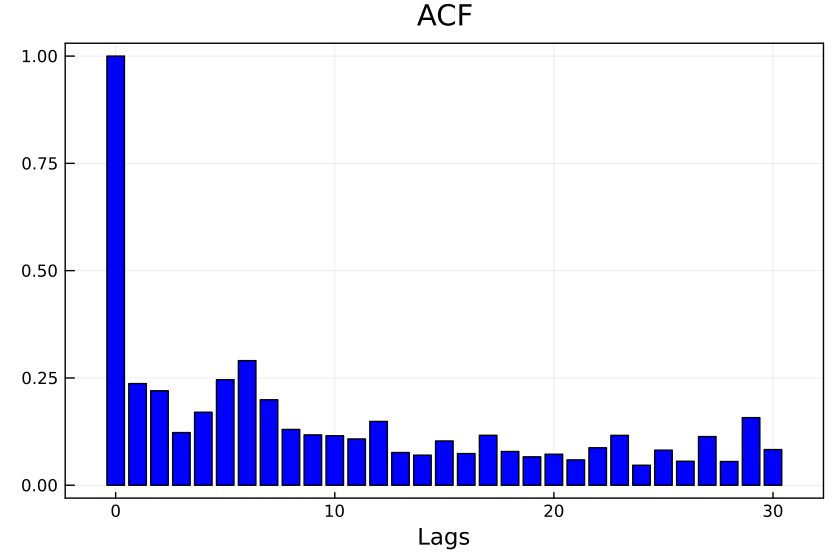

In [115]:
using Statistics
lags=0:30
acf_values = autocor(log_ret.^2, 0:30, demean=true)
acf_logret = bar(lags, acf_values, title="ACF", legend=false,framestyle=:box, color="green", size=(600,400),dpi=35, xlab="Lags")

**Volatility is extremely right-skewed. Spikes in volatility are the highest during the financial crisis of 2008-09.**

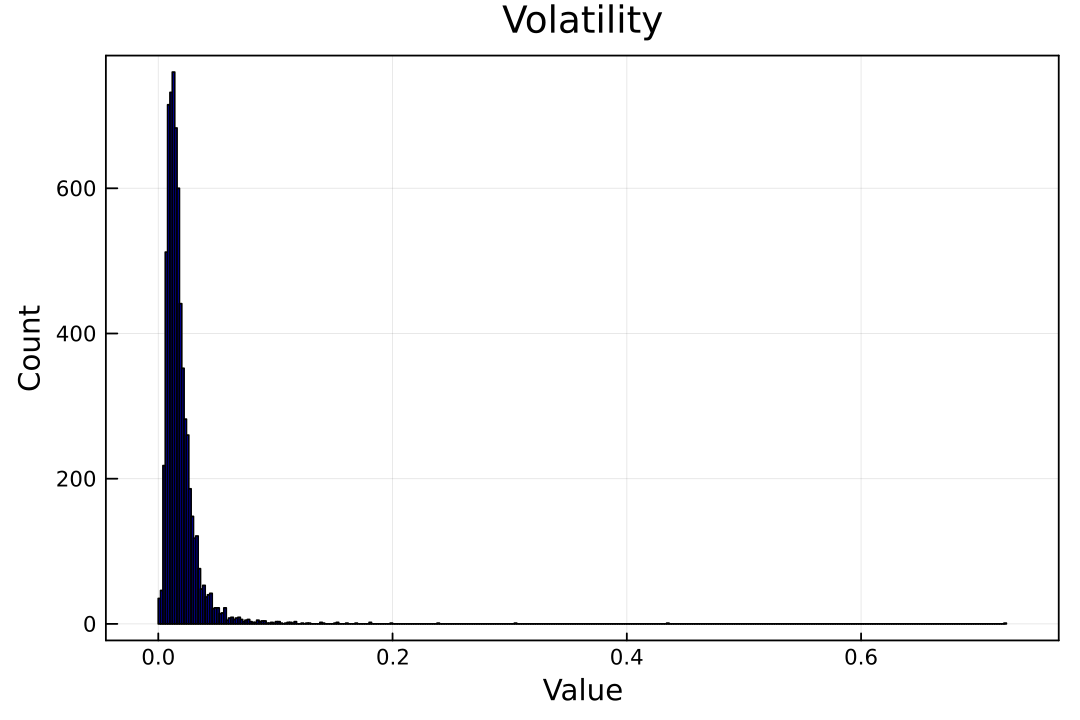

In [150]:
include("script.jl")
vol = volatility(data);
vol_histogram = histogram(vol, framestyle=:box, legend=false, title = "Volatility", ylab = "Count", xlab = "Value", color = "blue", dpi = 45)

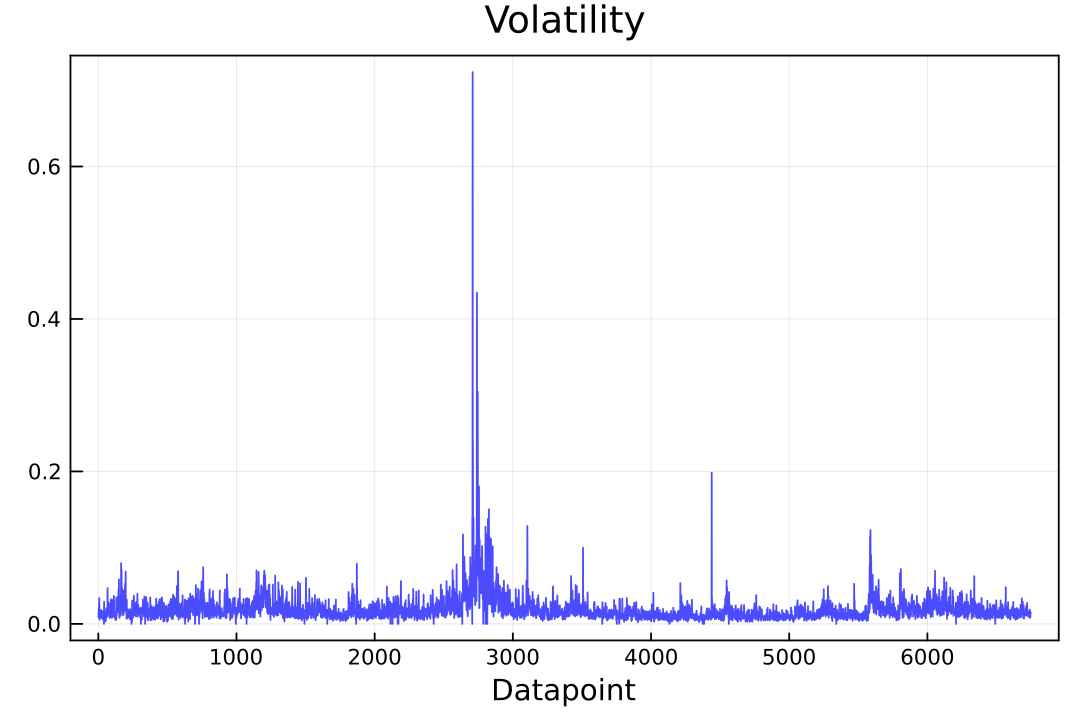

In [151]:
vol_plot = plot(vol, line=(1., 0.7, :solid),framestyle=:box, legend=false,title="Volatility",xlab = "Datapoint", color = "blue", dpi=45)

In [ ]:
using ARCHModels.jl
#fit_garch = fit(GARCH{1,1}, log_ret)

In [ ]:
using GARCH
fit_garch = fit(GARCH{1, 1}(), log_ret)

Precompiling GARCH
  ✗ BinaryProvider
  ✗ SpecialFunctions
  ✗ StatsFuns
  ✗ ForwardDiff
  ✗ Distributions
  ✗ MathOptInterface
  ✗ NLopt
